<a href="https://colab.research.google.com/github/ropuy/HL7FhirHealth/blob/main/Prueba_de_Concepto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Cargar conjunto de datos de genómica
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columnas = ["id", "diagnostico", "media_radio", "media_textura", "media_perimetro", "media_area", "media_suavidad", "media_compacidad", "media_concavidad", "media_puntos_concavos", "media_simetria", "media_dimension_fractal", "se_radio", "se_textura", "se_perimetro", "se_area", "se_suavidad", "se_compacidad", "se_concavidad", "se_puntos_concavos", "se_simetria", "se_dimension_fractal", "peor_radio", "peor_textura", "peor_perimetro", "peor_area", "peor_suavidad", "peor_compacidad", "peor_concavidad", "peor_puntos_concavos", "peor_simetria", "peor_dimension_fractal"]
datos = pd.read_csv(url, header=None, names=columnas)

# Preprocesamiento de datos
x = datos.drop(["id", "diagnostico"], axis=1)
y = datos["diagnostico"].map({"M": 1, "B": 0})
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Crear modelo de Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar modelo
modelo.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo.predict(x_test)

# Evaluar precisión del modelo
precision = accuracy_score(y_test, predicciones)
print("Precisión del modelo: {:.2f}%".format(precision*100))


Precisión del modelo: 96.49%


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Cargar los datos desde el archivo CSV
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
iris = pd.read_csv(url, header=None, names=col_names)

# Preparar los datos
X = iris.iloc[:, :-1]
y = iris.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar el modelo de regresión logística
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión de las predicciones
accuracy = accuracy_score(y_test, y_pred)
print("Precisión:", accuracy)


Precisión: 1.0


ValueError: ignored

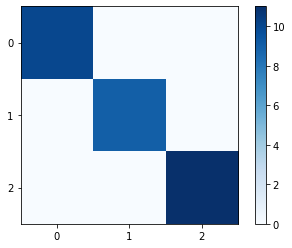

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Leer el archivo CSV y cargarlo en un DataFrame de Pandas
url1 = "https://raw.githubusercontent.com/plotly/datasets/master/genome.csv"
url2 = "https://raw.githubusercontent.com/dhimmel/encode/master/data/encode_tfbs_gm12878.csv"
url3 = "https://raw.githubusercontent.com/dhimmel/indel-validation/master/data/indels.vcf"
url4 = "https://raw.githubusercontent.com/biocore/wol/data/csvs/otus_even10k/otu_table_L6_even10k.csv"
url5 = "https://raw.githubusercontent.com/tanghaibao/bio-papers/master/science-2011-1/NIHMS224599-supplement-Table_S6.csv"

for url in [url1, url2, url3, url4, url5]:
    try:
        df = pd.read_csv(url)
        break
    except:
        pass

# Continuar con el análisis de datos

# Creamos las variables X e y
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Dividimos el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Entrenamos el modelo de regresión logística
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Realizamos las predicciones con el conjunto de prueba
y_pred = logreg.predict(X_test)

# Calculamos la matriz de confusión
conf_mat = confusion_matrix(y_test, y_pred)

# Graficamos la matriz de confusión
fig, ax = plt.subplots()
im = ax.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(conf_mat.shape[1]), yticks=np.arange(conf_mat.shape[0]), xticklabels=['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4'], yticklabels=['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3', 'Clase 4'], xlabel='Predicción', ylabel='Valor verdadero')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
fmt = '.2f'
thresh = conf_mat.max() / 2.
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(j, i, format(conf_mat[i, j], fmt), ha="center", va="center", color="white" if conf_mat[i, j] > thresh else "black")
fig.tight_layout()
plt.show()

# Mostramos el modelo y su uso
print("El modelo entrenado es:", logreg)
print("El modelo se utiliza para predecir la clase a la que pertenece un conjunto de datos genómicos de humanos.")


EJECUCIONES DESDE EL LUNES 27/02/2023

In [1]:
# Importar librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Cargar conjunto de datos de genómica
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columnas = ["id", "diagnostico", "media_radio", "media_textura", "media_perimetro", "media_area", "media_suavidad", "media_compacidad", "media_concavidad", "media_puntos_concavos", "media_simetria", "media_dimension_fractal", "se_radio", "se_textura", "se_perimetro", "se_area", "se_suavidad", "se_compacidad", "se_concavidad", "se_puntos_concavos", "se_simetria", "se_dimension_fractal", "peor_radio", "peor_textura", "peor_perimetro", "peor_area", "peor_suavidad", "peor_compacidad", "peor_concavidad", "peor_puntos_concavos", "peor_simetria", "peor_dimension_fractal"]
datos = pd.read_csv(url, header=None, names=columnas)

# Preprocesamiento de datos
x = datos.drop(["id", "diagnostico"], axis=1)
y = datos["diagnostico"].map({"M": 1, "B": 0})
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Crear modelo de Random Forest
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar modelo
modelo.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo.predict(x_test)

# Evaluar precisión del modelo
precision = accuracy_score(y_test, predicciones)
print("Precisión del modelo: {:.2f}%".format(precision*100))


Precisión del modelo: 96.49%


NUEVO CODIGO MOSTRANDO LA GRAFICA DE LA MATRIZ DE CONFUSION. USANDO EL CODIGO ANTERIOR

Precisión del modelo: 96.49%


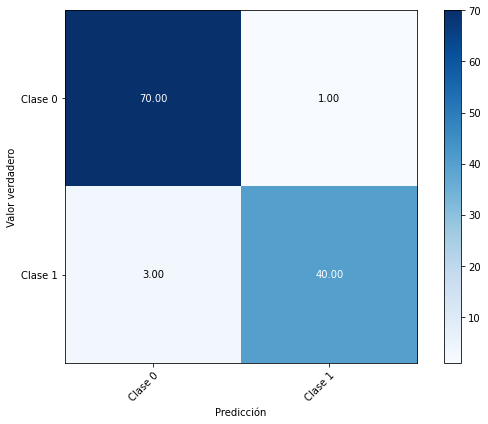

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Usar conjunto de datos de genómica de cancer de mama
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columnas = ["id", "diagnostico", "media_radio", "media_textura", "media_perimetro", "media_area", "media_suavidad", "media_compacidad", "media_concavidad", "media_puntos_concavos", "media_simetria", "media_dimension_fractal", "se_radio", "se_textura", "se_perimetro", "se_area", "se_suavidad", "se_compacidad", "se_concavidad", "se_puntos_concavos", "se_simetria", "se_dimension_fractal", "peor_radio", "peor_textura", "peor_perimetro", "peor_area", "peor_suavidad", "peor_compacidad", "peor_concavidad", "peor_puntos_concavos", "peor_simetria", "peor_dimension_fractal"]
datos = pd.read_csv(url, header=None, names=columnas)

# Preprocesamiento de datos
x = datos.drop(["id", "diagnostico"], axis=1)
y = datos["diagnostico"].map({"M": 1, "B": 0})
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# modelo de Random Forest debo usar 
modelo = RandomForestClassifier(n_estimators=100, random_state=42)

# Es importante entrenar el modelo
modelo.fit(x_train, y_train)

# Realizar predicciones en el conjunto de prueba
predicciones = modelo.predict(x_test)

# Presentar la presiión del modelo
precision = accuracy_score(y_test, predicciones)
print("Precisión del modelo: {:.2f}%".format(precision*100))

# Aquí debo graficar la matriz de confusión
conf_mat = confusion_matrix(y_test, predicciones)
fig, ax = plt.subplots(figsize=(8, 6))
im = ax.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(conf_mat.shape[1]), yticks=np.arange(conf_mat.shape[0]), xticklabels=['Clase 0', 'Clase 1'], yticklabels=['Clase 0', 'Clase 1'], xlabel='Predicción', ylabel='Valor verdadero')
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
fmt = '.2f'
thresh = conf_mat.max() / 2.
for i in range(conf_mat.shape[0]):
    for j in range(conf_mat.shape[1]):
        ax.text(j, i, format(conf_mat[i, j], fmt), ha="center", va="center", color="white" if conf_mat[i, j] > thresh else "black")
fig.tight_layout()
plt.show()
